<h1><strong><u>Spam Classifier Model</u></strong></h1>

In [3]:
%%capture
%run LogisticSpamClassifierModel.ipynb
%run NBSpamClassifierModel.ipynb

In [4]:
nb_model = bayesian_cv()
log_model = logistic_cv()
print(nb_model)
print(log_model)

Pipeline(steps=[('vect',
                 CountVectorizer(strip_accents='unicode', token_pattern=None,
                                 tokenizer=<function custom_tokenizer at 0x30900de40>)),
                ('samp', SMOTE(random_state=3)),
                ('clf', MultinomialNB(alpha=0.1))])
Pipeline(steps=[('vect',
                 TfidfVectorizer(token_pattern=None,
                                 tokenizer=<function custom_tokenizer at 0x167cb9ee0>)),
                ('samp', SMOTE(random_state=3)),
                ('clf', LogisticRegression(C=1))])


In [5]:
pipeline = ImbLearn_Pipeline(
    [
        ("pl", None)
    ]
) 
param_grid = {"pl": [nb_model, log_model]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=custom_f1_scorer_spam, verbose=1)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters:  {'pl': Pipeline(steps=[('vect',
                 TfidfVectorizer(token_pattern=None,
                                 tokenizer=<function custom_tokenizer at 0x167cb9ee0>)),
                ('samp', SMOTE(random_state=3)),
                ('clf', LogisticRegression(C=1))])}


<h2><strong><u>Model Testing</u></strong></h2>

<h3><strong><u>Performance Metrics</u></strong></h3>

In [6]:
test_predictions = best_model.predict(X_test)

In [7]:
for key, value in clf_metrics.items():
    print(f"{key}")
    log_test_values = cross_val_score(best_model, X_test, y=y_test, scoring=value, cv=5)
    print(f"CV test Scores: ", log_test_values)
    np_log_test_values = np.array(log_test_values)
    average = np.mean(np_log_test_values)
    stDev = np.std(np_log_test_values)
    print(f"Average and Standard Error: ", "{:.2f}%".format(average.round(2)), "\u00B1", "{:.2f}%".format(stDev.round(4)*100), "\n")

Accuracy
CV test Scores:  [0.98206278 0.97757848 0.98206278 0.96860987 0.97309417]
Average and Standard Error:  0.98% ± 0.52% 

F1 Score (Spam)
CV test Scores:  [0.93548387 0.91803279 0.9375     0.87272727 0.90322581]
Average and Standard Error:  0.91% ± 2.39% 

F1 Score (Ham)
CV test Scores:  [0.98958333 0.98701299 0.9895288  0.98209719 0.984375  ]
Average and Standard Error:  0.99% ± 0.29% 



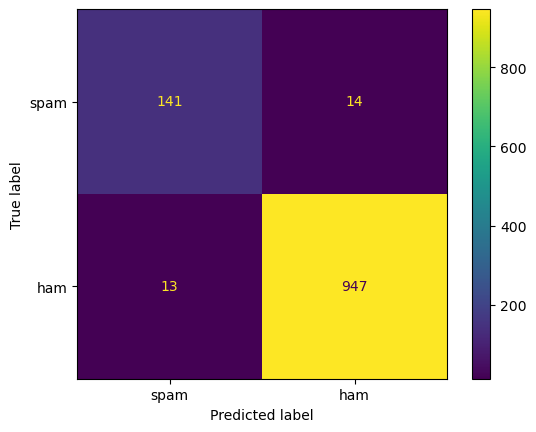

In [8]:
#Testing Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions, labels=['spam', 'ham'])

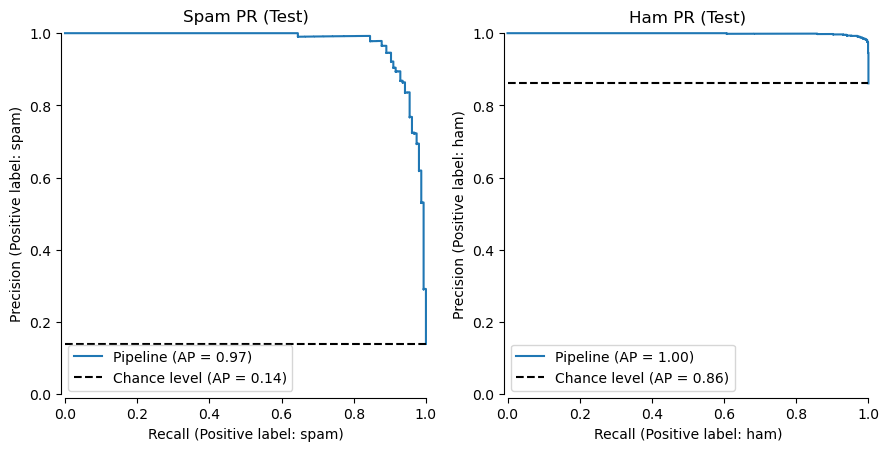

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(9, 9))
axs = axs.flatten()
count = 0
for label in test_labels:
    disp = PrecisionRecallDisplay.from_estimator(log_model, X_test, y_test, ax=axs[count], pos_label=label, plot_chance_level=True, despine=True)
    disp.ax_.set_title(f"{label.capitalize()} PR (Test)")
    count += 1

plt.tight_layout()  
plt.show()

<h1><strong><u>Final Thoughts</u></strong></h1>
After the Logistic and Bayesian models, as expected, the Logistic Regression model performed better than the Naive Bayes model.